In [184]:
import numpy as np

pi = np.pi

def f1(v):
    return v

def f2(theta):
    return -1*(np.sin(theta))

def euler(theta0, v0, dt, T):
    n = int(T/dt)
    t = np.empty(n+1)
    v = np.empty(n+1)
    theta = np.empty(n+1)
    
    t[0] = 0.0
    v[0] = v0
    theta[0] = theta0
    
    for i in range(n):
        theta[i+1] = theta[i] + dt * f1(v[i])
        v[i+1] = v[i] + dt * f2(theta[i])
        t[i+1] = t[i] + dt
        
    return t, v, theta

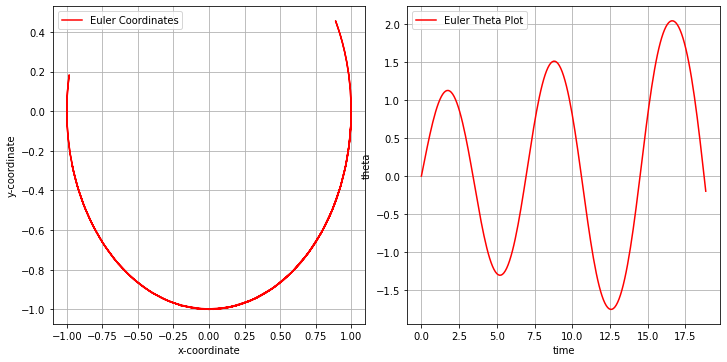

In [194]:
import matplotlib.pyplot as plt

t, v, theta = euler(0, 1, (6*pi)/200, 6*pi)

def calculateCoordinates(theta):
    n = len(theta)
    x_coordinates = np.empty(n)
    y_coordinates = np.empty(n)
    for i in range(n):
        x_coordinates[i] = np.sin(theta[i])
        y_coordinates[i] = -1*np.cos(theta[i])
    return x_coordinates, y_coordinates
    
x_coordinates, y_coordinates = calculateCoordinates(theta)

fig, plot = plt.subplots(1,2)
fig.set_figwidth(10)
fig.set_figheight(5)
plt.tight_layout()

plot[0].plot(x_coordinates, y_coordinates, "-r", label="Euler Coordinates")
plot[0].legend(loc="upper left")
plot[0].set_xlabel("x-coordinate")
plot[0].set_ylabel("y-coordinate")
plot[0].grid()

plot[1].plot(t, theta, "-r", label="Euler Theta Plot")
plot[1].legend(loc="upper left")
plot[1].set_ylabel("theta")
plot[1].set_xlabel("time")
plot[1].grid()

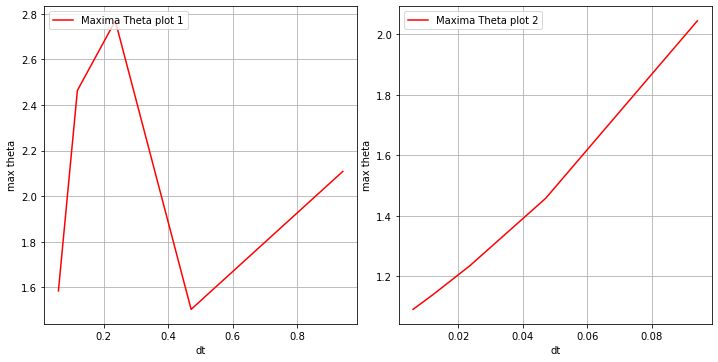

In [186]:
theta0 = 0
v0 = 1
totalT = 6*pi

maxThetas1 = np.empty(5)
maxThetas2 = np.empty(5)
dtList1 = np.empty(5)
dtList2 = np.empty(5)

def calculateMaxThetas(startingDt):
    thetasList = np.empty(5)
    dtList = np.empty(5)
    dt=startingDt
    for i in range(5):
        dt=dt/2
        t, _, theta = euler(theta0, v0, dt, totalT)
        thetasList[i] = max(theta)
        dtList[i] = dt
    return dtList, thetasList

dtList1, maxThetas1 = calculateMaxThetas((6*pi)/10)
dtList2, maxThetas2 = calculateMaxThetas((6*pi)/100)
    
fig, plot = plt.subplots(1,2)
fig.set_figwidth(10)
fig.set_figheight(5)
plt.tight_layout()

plot[0].plot(dtList1, maxThetas1, "-r", label="Maxima Theta plot 1")
plot[0].legend(loc="upper left")
plot[0].set_ylabel("max theta")
plot[0].set_xlabel("dt")
plot[0].grid()

plot[1].plot(dtList2, maxThetas2, "-r", label="Maxima Theta plot 2")
plot[1].legend(loc="upper left")
plot[1].set_ylabel("max theta")
plot[1].set_xlabel("dt")
plot[1].grid()

In [187]:
import plotly.graph_objects as go

def diffFromPrevious(l):
    diffFromPreviousList = np.empty(5)
    diffFromPreviousList[0] = 0
    for i in range(len(l)-1):
        diffFromPreviousList[i+1] = l[i]-l[i+1]
    return diffFromPreviousList

predictionTheta = 1

fig = go.Figure(data=[go.Table(header=dict(values=['dt', 'maxTheta', 'maxTheta - predictionTheta', 'diff']),
                 cells=dict(values=[dtList1, maxThetas1, maxThetas1-predictionTheta, diffFromPrevious(maxThetas1)]))
                     ])
fig.show()

fig = go.Figure(data=[go.Table(header=dict(values=['dt', 'maxTheta', 'maxTheta - predictionTheta', 'diff']),
                 cells=dict(values=[dtList2, maxThetas2, maxThetas2-predictionTheta, diffFromPrevious(maxThetas2)]))
                     ])
fig.show()

In [189]:
def midpointMethod(theta0, v0, dt, T):
    n = int(T/dt)
    t = np.empty(n+1)
    v = np.empty(n+1)
    theta = np.empty(n+1)
    
    t[0] = 0.0
    v[0] = v0
    theta[0] = theta0
    
    for i in range(n):
        thetaHalf = theta[i] + (dt/2) * f1(v[i])
        vHalf = v[i] + (dt/2) * f2(theta[i])
        
        theta[i+1] = theta[i] + dt * f1(vHalf)
        v[i+1] = v[i] + dt * f2(thetaHalf)
        
        t[i+1] = t[i] + dt
        
    return t, v, theta

t, v, theta = midpointMethod(0, 1, (6*pi)/200, 6*pi)

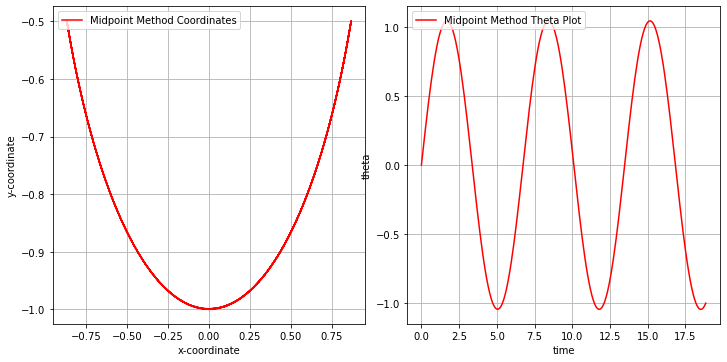

In [193]:
x_coordinates, y_coordinates = calculateCoordinates(theta)

fig, plot = plt.subplots(1,2)
fig.set_figwidth(10)
fig.set_figheight(5)
plt.tight_layout()

plot[0].plot(x_coordinates, y_coordinates, "-r", label="Midpoint Method Coordinates")
plot[0].legend(loc="upper left")
plot[0].set_xlabel("x-coordinate")
plot[0].set_ylabel("y-coordinate")
plot[0].grid()

plot[1].plot(t, theta, "-r", label="Midpoint Method Theta Plot")
plot[1].legend(loc="upper left")
plot[1].set_ylabel("theta")
plot[1].set_xlabel("time")
plot[1].grid()

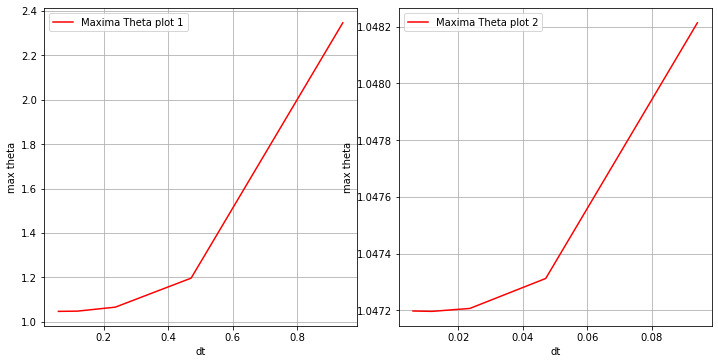

In [191]:
theta0 = 0
v0 = 1
totalT = 6*pi

maxThetas1 = np.empty(5)
maxThetas2 = np.empty(10)
dtList1 = np.empty(5)
dtList2 = np.empty(5)

def calculateMaxThetas(startingDt):
    thetasList = np.empty(5)
    dtList = np.empty(5)
    dt=startingDt
    for i in range(5):
        dt=dt/2
        t, _, theta = midpointMethod(theta0, v0, dt, totalT)
        thetasList[i] = max(theta)
        dtList[i] = dt
    return dtList, thetasList

dtList1, maxThetas1 = calculateMaxThetas((6*pi)/10)
dtList2, maxThetas2 = calculateMaxThetas((6*pi)/100)
    
fig, plot = plt.subplots(1,2)
fig.set_figwidth(10)
fig.set_figheight(5)
plt.tight_layout()

plot[0].plot(dtList1, maxThetas1, "-r", label="Maxima Theta plot 1")
plot[0].legend(loc="upper left")
plot[0].set_ylabel("max theta")
plot[0].set_xlabel("dt")
plot[0].grid()

plot[1].plot(dtList2, maxThetas2, "-r", label="Maxima Theta plot 2")
plot[1].legend(loc="upper left")
plot[1].set_ylabel("max theta")
plot[1].set_xlabel("dt")
plot[1].grid()

In [192]:
predictionTheta = 1

fig = go.Figure(data=[go.Table(header=dict(values=['dt', 'maxTheta', 'maxTheta - predictionTheta', 'diff']),
                 cells=dict(values=[dtList1, maxThetas1, maxThetas1-predictionTheta, diffFromPrevious(maxThetas1)]))
                     ])
fig.show()

fig = go.Figure(data=[go.Table(header=dict(values=['dt', 'maxTheta', 'maxTheta - predictionTheta', 'diff']),
                 cells=dict(values=[dtList2, maxThetas2, maxThetas2-predictionTheta, diffFromPrevious(maxThetas2)]))
                     ])
fig.show()